In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
data = pd.read_csv('Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [5]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [7]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [8]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [9]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [10]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [11]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 18s - loss: 0.0433 - 18s/epoch - 519ms/step
Epoch 2/20
35/35 - 13s - loss: 0.0109 - 13s/epoch - 375ms/step
Epoch 3/20
35/35 - 10s - loss: 0.0152 - 10s/epoch - 295ms/step
Epoch 4/20
35/35 - 9s - loss: 0.0107 - 9s/epoch - 257ms/step
Epoch 5/20
35/35 - 9s - loss: 0.0082 - 9s/epoch - 248ms/step
Epoch 6/20
35/35 - 9s - loss: 0.0075 - 9s/epoch - 253ms/step
Epoch 7/20
35/35 - 9s - loss: 0.0096 - 9s/epoch - 268ms/step
Epoch 8/20
35/35 - 9s - loss: 0.0078 - 9s/epoch - 264ms/step
Epoch 9/20
35/35 - 8s - loss: 0.0091 - 8s/epoch - 232ms/step
Epoch 10/20
35/35 - 9s - loss: 0.0068 - 9s/epoch - 262ms/step
Epoch 11/20
35/35 - 9s - loss: 0.0059 - 9s/epoch - 267ms/step
Epoch 12/20
35/35 - 8s - loss: 0.0062 - 8s/epoch - 228ms/step
Epoch 13/20
35/35 - 9s - loss: 0.0059 - 9s/epoch - 265ms/step
Epoch 14/20
35/35 - 10s - loss: 0.0058 - 10s/epoch - 275ms/step
Epoch 15/20
35/35 - 8s - loss: 0.0057 - 8s/epoch - 242ms/step
Epoch 16/20
35/35 - 9s - loss: 0.0050 - 9s/epoch - 251ms/step
Epoch 17/

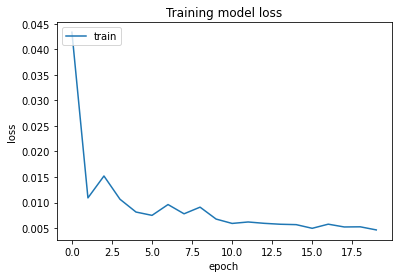

In [12]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [13]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [14]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 2s 77ms/step


array([[1.1766884],
       [1.1801214],
       [1.1902256],
       [1.2057877],
       [1.2204807],
       [1.2254636],
       [1.2184626],
       [1.203931 ],
       [1.1909119],
       [1.1836209],
       [1.175607 ],
       [1.1651465],
       [1.1552223],
       [1.145937 ],
       [1.1419843],
       [1.1440136],
       [1.1574397],
       [1.1813755],
       [1.2115114],
       [1.2436575],
       [1.2631326],
       [1.267773 ],
       [1.2551806],
       [1.2304578],
       [1.2033135],
       [1.1828591],
       [1.1724739],
       [1.1681107],
       [1.1620487],
       [1.1538156],
       [1.144133 ],
       [1.1325417],
       [1.1153984],
       [1.0932665],
       [1.0799919],
       [1.0822669],
       [1.0976918],
       [1.1198258],
       [1.1437881],
       [1.1603445],
       [1.1748989],
       [1.1897376],
       [1.2057239],
       [1.2210224],
       [1.2326081],
       [1.2366303],
       [1.2307022],
       [1.222427 ],
       [1.2174337],
       [1.2190303],


In [15]:
predicted_price = sc.inverse_transform(y_pred)

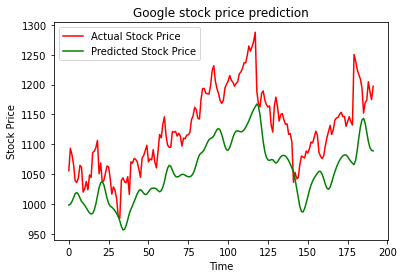

In [16]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()